# Lecture 18: Data Visualization in Python 

## Exercise 1

### Background

You've conducted a kinetics study measuring the concentration of a reactant over time at three different temperatures (298 K, 308 K, and 318 K). You need to visualize this data effectively to communicate your findings.

### Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate kinetics data
time = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])  # minutes

# Concentration data (M) with experimental uncertainty
conc_298K = np.array([1.00, 0.85, 0.72, 0.61, 0.52, 0.44, 0.37, 0.32, 0.27, 0.23, 0.19])
conc_308K = np.array([1.00, 0.78, 0.61, 0.48, 0.37, 0.29, 0.23, 0.18, 0.14, 0.11, 0.09])
conc_318K = np.array([1.00, 0.70, 0.49, 0.34, 0.24, 0.17, 0.12, 0.08, 0.06, 0.04, 0.03])

# Experimental uncertainty (±0.02 M)
uncertainty = 0.02

# Create DataFrame
df = pd.DataFrame({
    'Time (min)': np.tile(time, 3),
    'Concentration (M)': np.concatenate([conc_298K, conc_308K, conc_318K]),
    'Temperature (K)': np.repeat([298, 308, 318], len(time)),
    'Uncertainty': uncertainty
})

In [2]:
df.describe()

,Time (min),Concentration (M),Temperature (K),Uncertainty
count,33.000000,33.000000,33.000000,33.00
mean,25.000000,0.396061,308.000000,0.02
std,16.056541,0.296742,8.291562,0.00
min,0.000000,0.030000,298.000000,0.02
25%,10.000000,0.170000,298.000000,0.02
50%,25.000000,0.320000,308.000000,0.02
75%,40.000000,0.610000,318.000000,0.02
max,50.000000,1.000000,318.000000,0.02


### Instructions 

### Part A: Appropriate Plot Selection (20 minutes)

Create three different visualizations of the same kinetics data:

- A line plot showing concentration vs. time for all three temperatures
- A scatter plot with the same data
- A bar plot with the same data


Analysis: Think about how you would explain each of the different plots:

- Which plot type is most appropriate for this kinetics data and why?
- Line plot will be the best here since we have two continuos input variable time and concentration so  we can track all the changes throughout the experiment at different Temperatures



- What are the advantages and disadvantages of each approach?
- When might you use each type of plot in chemistry?


Best Practices: Create a publication-quality version of the most appropriate plot including:

- Proper axis labels with units
- A clear legend

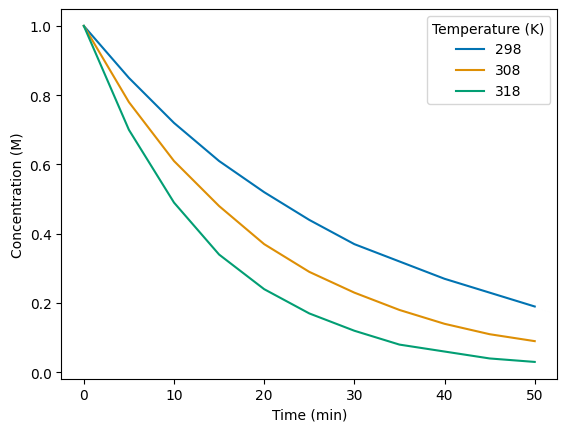

In [4]:
sns.lineplot(data=df, 
            x="Time (min)",
            y="Concentration (M)",
            hue= "Temperature (K)",
            palette="colorblind")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (M)")
plt.show()


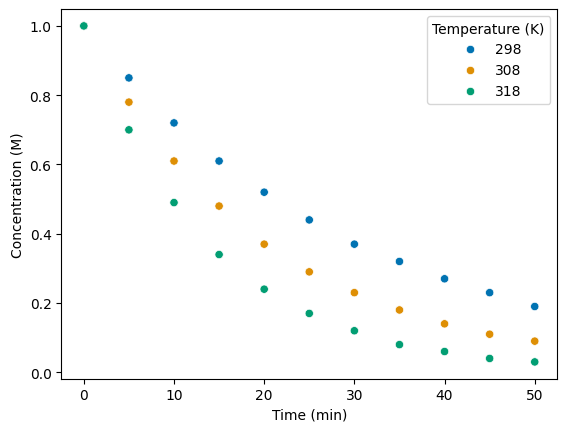

In [5]:
sns.scatterplot(data=df, 
            x="Time (min)",
            y="Concentration (M)",
            hue= "Temperature (K)",
            palette="colorblind")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (M)")
plt.show()

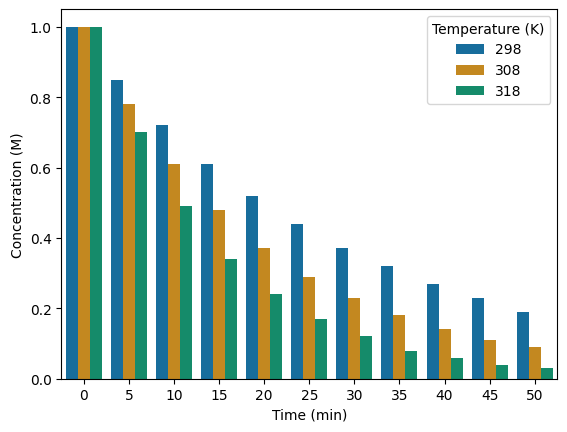

In [6]:
sns.barplot(data=df, 
            x="Time (min)",
            y="Concentration (M)",
            hue= "Temperature (K)",
            palette="colorblind")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (M)")
plt.show()

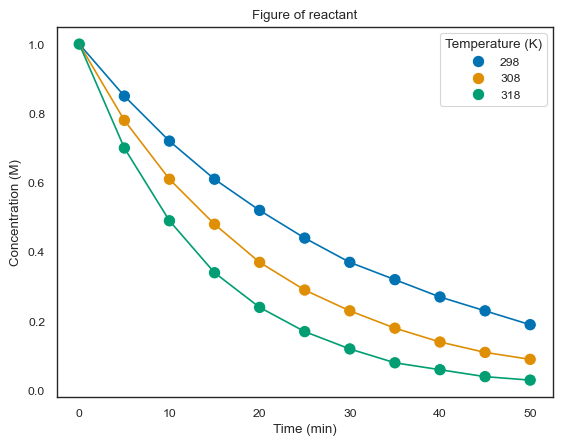

In [31]:
#Best plot is scatter + line together found here
sns.set_theme(style="white", context="paper")
sns.scatterplot(
    data=df,
    x="Time (min)",
    y="Concentration (M)",
    hue="Temperature (K)",
    palette="colorblind",
    s=80
)

sns.lineplot(
    data=df,
    x="Time (min)",
    y="Concentration (M)",
    hue="Temperature (K)",
    palette="colorblind",
    legend=False   # avoid duplicate legends
)

plt.xlabel("Time (min)")
plt.ylabel("Concentration (M)")
plt.title("Figure of reactant")
plt.show()


### Part B: Different Colour palettes

Create four versions of your kinetics line plot using different color palettes:

- Default matplotlib colors
- A seaborn color palette of your choice
- A colorblind-friendly palette (e.g., 'colorblind' or 'Set2')
- A grayscale palette (for black & white printing)

Compare and think about:

- Which palette provides the best contrast and readability?
- Which would work best for colorblind readers?
- Which is most suitable for print publications?


Code hint:


```python
# Example for setting seaborn palette
sns.set_palette("husl")
# or
colors = sns.color_palette("colorblind", 3)
```

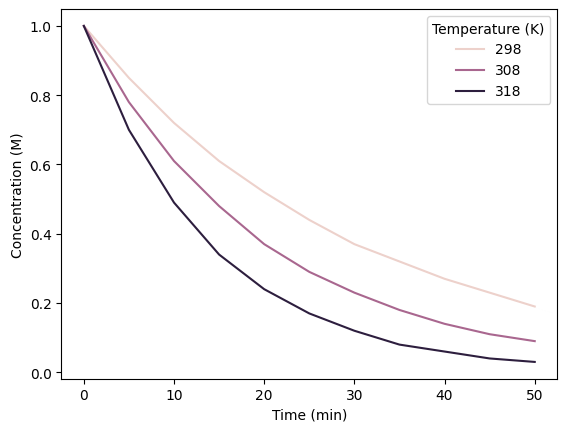

In [15]:
sns.lineplot(data=df, 
            x="Time (min)",
            y="Concentration (M)",
            hue= "Temperature (K)")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (M)")
plt.show()


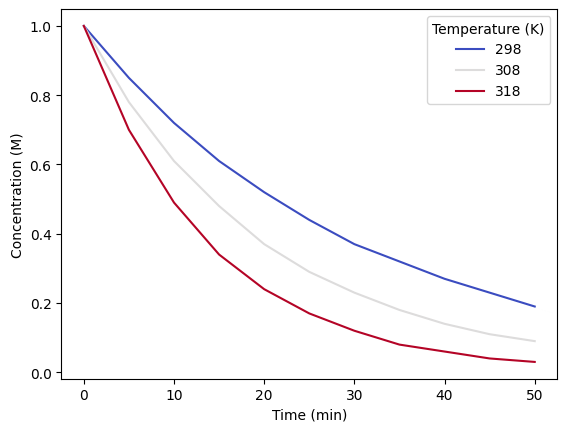

In [21]:
colors = sns.color_palette("coolwarm", as_cmap=True)
sns.lineplot(data=df, 
            x="Time (min)",
            y="Concentration (M)",
            hue= "Temperature (K)",
            palette=colors)
plt.xlabel("Time (min)")
plt.ylabel("Concentration (M)")
plt.show()


/var/folders/nm/01cqfvgn1655c0dthf5dhh900000gn/T/ipykernel_4012/3998238909.py:1: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.lineplot(data=df,


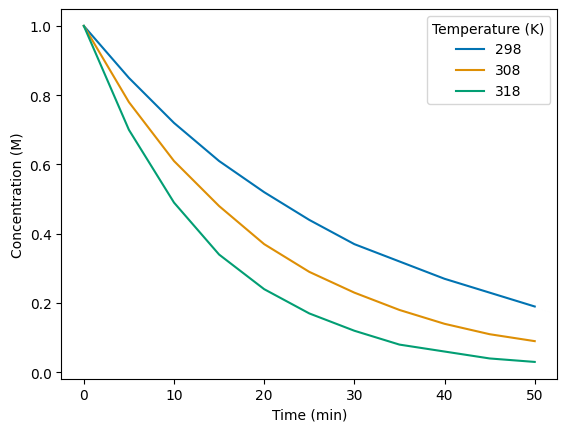

In [24]:
sns.lineplot(data=df, 
            x="Time (min)",
            y="Concentration (M)",
            hue= "Temperature (K)",
            palette=sns.color_palette("colorblind"))
plt.xlabel("Time (min)")
plt.ylabel("Concentration (M)")
plt.show()


### Part C: Error Bars and Uncertainty

Improve your best plot with proper error bars:

- Add error bars (±0.02 M) to all data points
- Adjust the error bar style (transparency, cap size) for readability
- Consider whether error bars on every point are necessary or if every nth point would be clearer

Experiment with different error bar styles:

- Standard error bars with caps
- Error bars without caps
- Shaded confidence regions (use plt.fill_between())

Which error representation method is clearest for this dataset? Why might you choose one over another?

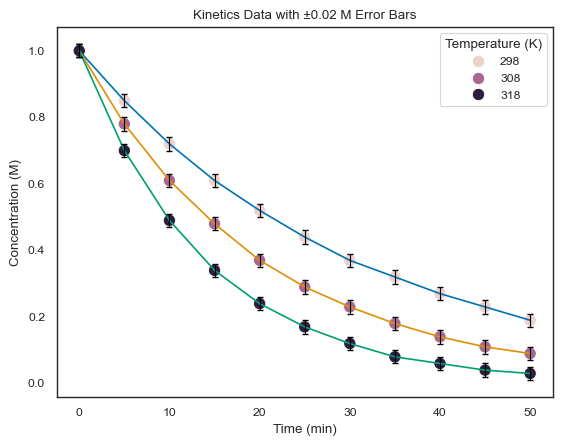

In [44]:
error = 0.02

sns.scatterplot(
    data=df,
    x="Time (min)",
    y="Concentration (M)",
    hue="Temperature (K)",
    s=80
)

sns.lineplot(data=df, 
            x="Time (min)",
            y="Concentration (M)",
            hue= "Temperature (K)",
            palette="colorblind",legend=False)

plt.errorbar(
    df["Time (min)"],
    df["Concentration (M)"],
    yerr=error,
    fmt="none",      # no marker, only error bars
    ecolor="black",  # error bar color
    elinewidth=.8,    # thickness
    capsize=2        # adds small caps on ends
)

plt.xlabel("Time (min)")
plt.ylabel("Concentration (M)")
plt.title("Kinetics Data with ±0.02 M Error Bars")
plt.show()


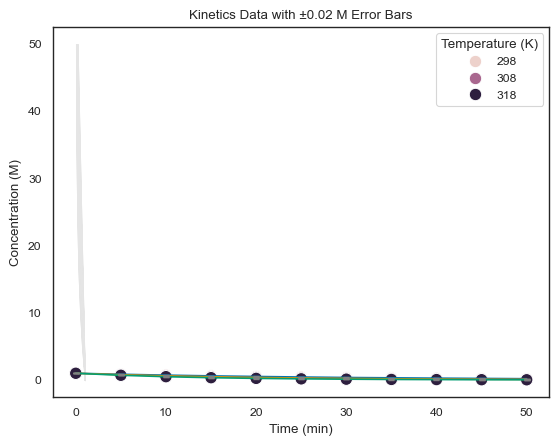

In [50]:
error = 0.02

sns.scatterplot(
    data=df,
    x="Time (min)",
    y="Concentration (M)",
    hue="Temperature (K)",
    s=80
)

sns.lineplot(data=df, 
            x="Time (min)",
            y="Concentration (M)",
            hue= "Temperature (K)",
            palette="colorblind",legend=False)

plt.errorbar(
    df["Time (min)"],
    df["Concentration (M)"],
    yerr=error,
    fmt="none",      # no marker, only error bars
    ecolor="gray",  # error bar color
    elinewidth=.8,    # thickness
    capsize=2        # adds small caps on ends
)
plt.fill_between(
    df["Concentration (M)"],
    df["Time (min)"] - error,
    df["Time (min)"] + error,
    color="gray",
    alpha=0.2
)

plt.xlabel("Time (min)")
plt.ylabel("Concentration (M)")
plt.title("Kinetics Data with ±0.02 M Error Bars")
plt.show()


### Part D: Saving High-Quality Figures

Save your final figure in multiple formats:

- PNG at 300 DPI (for presentations)
- PDF (for publications)
- SVG (for vector editing in e.g. Adobe Illustrator or Inkscape)


Code template:

```python
plt.savefig('kinetics_plot.png', dpi=300, bbox_inches='tight')
plt.savefig('kinetics_plot.pdf', bbox_inches='tight')
plt.savefig('kinetics_plot.svg', bbox_inches='tight')
```

Compare file sizes and quality: Open each file and note the differences in file size and image quality.



## Exercise 2:

### Background

You've collected UV-Vis absorbance spectra for a series of compounds and need to create different visualizations to explore the data from various perspectives.

### Dataset

In [65]:
# UV-Vis spectroscopy data
wavelengths = np.arange(200, 501, 5)  # 200-500 nm

# Generate spectra for 4 different compounds
np.random.seed(42)
compounds = {
    'Compound A': np.exp(-((wavelengths-280)/30)**2) * 1.2 + np.random.normal(0, 0.02, len(wavelengths)),
    'Compound B': np.exp(-((wavelengths-320)/40)**2) * 0.9 + np.random.normal(0, 0.02, len(wavelengths)),
    'Compound C': np.exp(-((wavelengths-260)/25)**2) * 1.5 + np.random.normal(0, 0.02, len(wavelengths)),
    'Compound D': np.exp(-((wavelengths-350)/35)**2) * 0.7 + np.random.normal(0, 0.02, len(wavelengths))
}

# Lambda max values for each compound
lambda_max = {'A': 280, 'B': 320, 'C': 260, 'D': 350}
max_absorbance = {'A': 1.2, 'B': 0.9, 'C': 1.5, 'D': 0.7}

# Concentration series for Beer's Law
concentrations = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])  # μM
absorbances = concentrations * 0.42  # ε = 42000 M⁻¹cm⁻¹
abs_errors = np.array([0, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04])

### Instructions

### Part A: Line Plots for Spectroscopy

Create a multi-line plot showing all four UV-Vis spectra on the same axes

Customize the plot:

- Use different line styles (solid, dashed, dotted) in addition to colors
- Add vertical lines indicating λ_max for each compound
- Annotate the λ_max values on the plot
- Set appropriate axis limits to focus on the region of interest

Create a subplot figure showing each spectrum individually in a 2×2 grid

In [67]:
df_uv = pd.DataFrame({
    "Wavelength (nm)": wavelengths,
    "Compound A": compounds["Compound A"],
    "Compound B": compounds["Compound B"],
    "Compound C": compounds["Compound C"],
    "Compound D": compounds["Compound D"],
})
df_uv

,Wavelength (nm),Compound A,Compound B,Compound C,Compound D
0,200,0.010913,-0.003602,0.032783,0.009649
1,205,-0.000449,-0.021895,-0.016176,-0.004469
2,210,0.018138,-0.023457,0.039211,0.014280
3,215,0.041436,0.017166,0.102555,0.009465
4,220,0.017296,0.028862,0.096146,-0.001456
...,...,...,...,...,...
56,480,-0.016784,-0.023373,-0.005293,0.017049
57,485,-0.006184,0.022856,0.054403,-0.015850
58,490,0.006625,0.015039,0.012513,-0.002295
59,495,0.019511,0.015821,-0.017143,0.010100


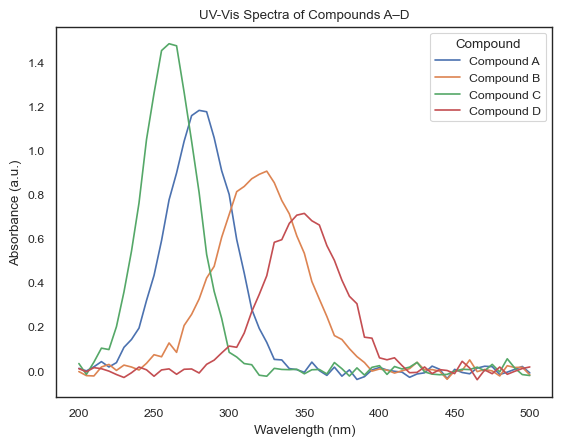

In [69]:
for name, spectrum in compounds.items():
    plt.plot(wavelengths, spectrum, label=name)

  
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance (a.u.)")
plt.title("UV-Vis Spectra of Compounds A–D")
plt.legend(title="Compound")
plt.show()

### Part B: Scatter Plots and Linear Regression (15 minutes)

Create a Beer's Law calibration curve:

- Scatter plot of absorbance vs. concentration
- Add error bars to absorbance measurements
- Fit and overlay a linear regression line
- Display the equation and R² value on the plot

Code hint for regression:

```python
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(concentrations, absorbances)
```

In [72]:
sns.scatterplot(data=df_uv, 
            x="Wavelength (nm)",
            y= [compounds[name] for name in compounds] ,
            hue= "Compound",
            palette="colorblind")
plt.xlabel("Wavelength (nm)")
plt.ylabel("Absorbance (a.u.)") 
plt.show()

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 61 and the vector passed to `y` has length 4.

### Part C: Bar Charts for Comparisons

Create a bar chart comparing the maximum absorbance values of all four compounds

- Include error bars (assume ±5% error)
- Use different colors for each compound
- Add value labels on top of each bar


Create a grouped bar chart showing two properties:

- λ_max values (use secondary y-axis)
- Maximum absorbance values (primary y-axis)

### Part D: Distribution Plots 

Generate replicate measurements for compound A:

```python
# Simulate 50 replicate measurements at λ_max
replicates_A = np.random.normal(1.2, 0.05, 50)
replicates_B = np.random.normal(0.9, 0.04, 50)
replicates_C = np.random.normal(1.5, 0.06, 50)
replicates_D = np.random.normal(0.7, 0.03, 50)
```

Create multiple distribution visualizations:

- Histogram with KDE (kernel density estimate) overlay for compound A (hint: Have a look at seaborn's histogram plot)
- Violin plots comparing all four compounds
- Box plots comparing all four compounds side-by-side


Which distribution plot type best shows:

- The spread of data?
- The presence of outliers?
- The comparison between multiple groups?


### Part E: Multi-Panel Figure

Create a publication-ready multi-panel figure combining:

- Panel A: All UV-Vis spectra (line plot)
- Panel B: Beer's Law calibration curve (scatter + line)
- Panel C: Maximum absorbance comparison (bar chart)
- Panel D: Distribution of replicates (violin plot)

Requirements:

- Use plt.subplot() or fig.add_subplot() to create a 2×2 layout
- Add panel labels (A, B, C, D) to each subplot
- Ensure consistent styling across all panels
- Use a coherent color scheme throughout
- Save as a high-quality figure (300 DPI, PDF format)

Code hint:

```python
fig = plt.figure(figsize=(12, 10))

# Panel A
ax1 = fig.add_subplot(2, 2, 1)
# ... your plotting code ...
ax1.text(-0.1, 1.05, 'A', transform=ax1.transAxes, 
         fontsize=16, fontweight='bold')

# Repeat for other panels...
```